In [29]:
import pyemu
import flopy as fp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [30]:
t_d ="master_glm"
case = "2D_test"
pst = pyemu.Pst(os.path.join(t_d,"{}.pst".format(case)))
pst.write_par_summary_table(filename="none")

,type,transform,count,initial value,upper bound,lower bound,standard deviation
kp_inst:0,kp_inst:0,log,151,0,2,-2,1


[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

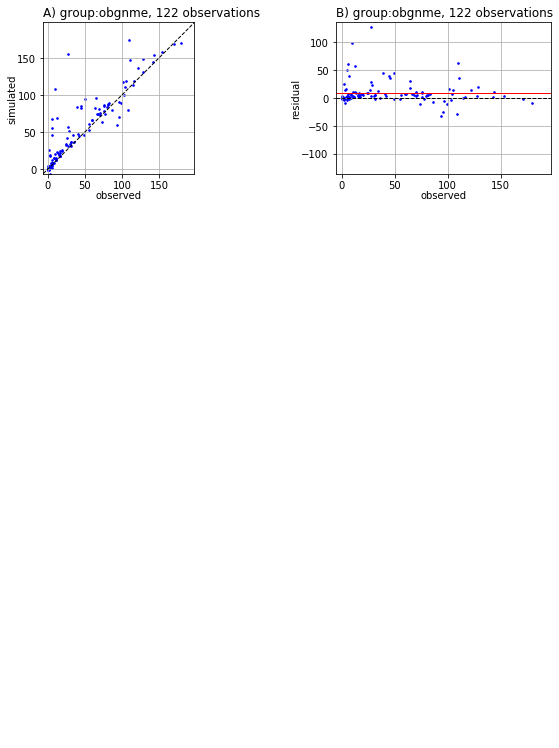

In [31]:
pst.plot(kind='1to1')

In [32]:
pst.control_data.noptmax = 7 # number of iterations (should be set to a great value (50))
pst.pestpp_options["n_iter_base"] = -1
pst.pestpp_options["n_iter_super"] = 4
pst.pestpp_options["glm_num_reals"] = 50 # how many draws
pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(t_d,"{}.pst".format(case)))

noptmax:7, npar_adj:151, nnz_obs:122


In [33]:
# DO the inversion
m_d = "master_glm_run"
pyemu.os_utils.start_workers(t_d,"../../pestpp-glm.exe","{}.pst".format(case),num_workers=10,worker_root=".",
                             master_dir=m_d)

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

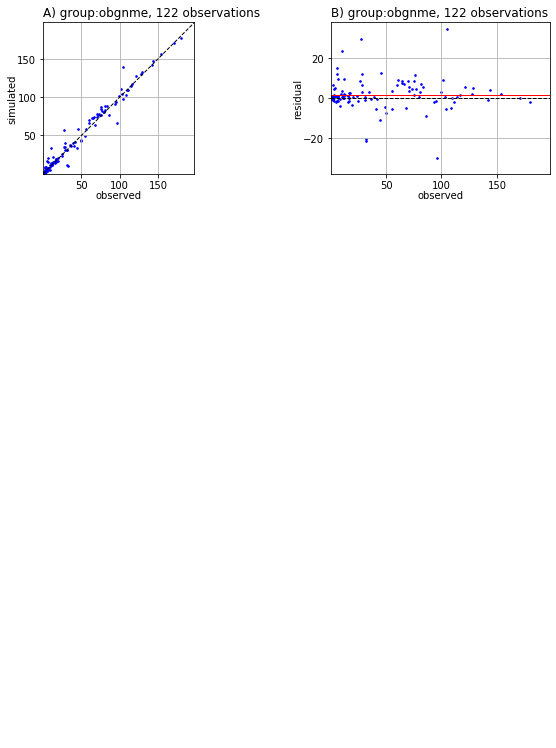

In [34]:
pst_2 = pyemu.Pst(os.path.join(m_d,"{}.pst".format(case)))
pst_2.plot(kind="1to1")

6912.76644795901 {'obgnme': 6912.76644795901} {'obgnme': 1.0}


[None,
 None,

<Figure size 576x756 with 0 Axes>

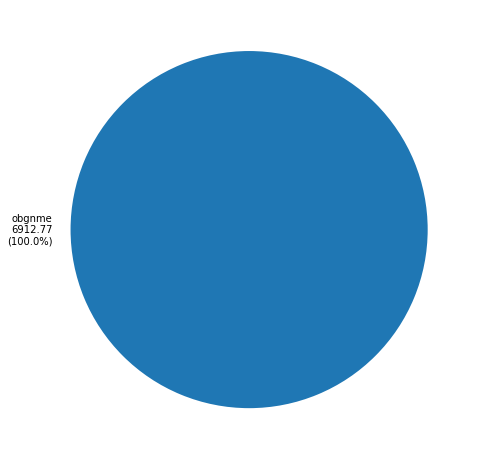

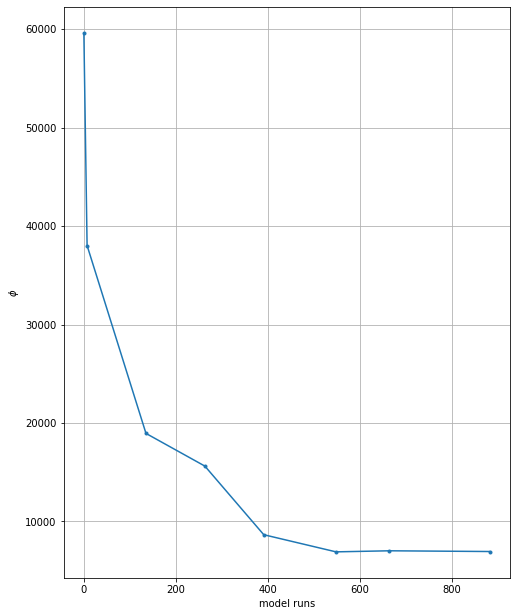

In [35]:
pst_2.plot()

C:\Users\emmal\Anaconda3\lib\site-packages\pyemu\en.py:365: UserWarning: Ensemble.from_dataframe() is deprecated and has been replaced with the standard constructor, which takesthe same arguments
  warnings.warn("Ensemble.from_dataframe() is deprecated and has been "


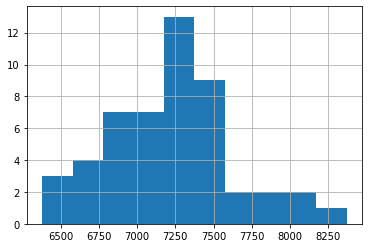

In [36]:
df = df=pd.read_csv(os.path.join(m_d,"{}.post.obsen.csv".format(case)),index_col=0)
oe = pyemu.ObservationEnsemble.from_dataframe(pst=pst,df=df)

ax = oe.phi_vector.hist()

In [37]:
dfp = df=pd.read_csv(os.path.join(m_d,"{}.par.usum.csv".format(case)),index_col=0)
dfp["post_mean"]

name
KP_INST:0_I:12_J:124     0.284177
KP_INST:0_I:28_J:124    -0.106744
KP_INST:0_I:36_J:116    -0.016333
KP_INST:0_I:36_J:124     0.298818
KP_INST:0_I:44_J:100     0.322915
                           ...   
KP_INST:0_I:164_J:68    -1.602020
KP_INST:0_I:164_J:92     2.000000
KP_INST:0_I:164_J:100   -0.660857
KP_INST:0_I:172_J:52     0.282160
KP_INST:0_I:172_J:60    -1.198570
Name: post_mean, Length: 151, dtype: float64

(array([13.,  2.,  1.,  2.,  3.,  6.,  4.,  6.,  6.,  7.,  9., 14., 10.,
         8., 11.,  6.,  5.,  5.,  5., 28.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
         0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 20 Patch objects>)

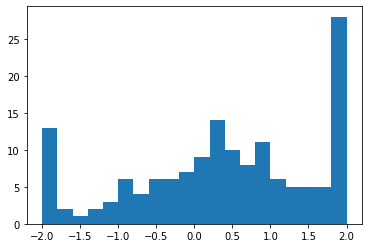

In [49]:
plt.hist(dfp["post_mean"],bins=20)

In [38]:
pst_2.parameter_data.parval1 = 10**dfp["post_mean"].values
pst_2.control_data.noptmax = 0 # one run

pst_2.write(os.path.join(t_d,"{}.pst".format(case)))
pyemu.os_utils.run("..\..\pestpp-glm.exe {}".format(case),cwd=t_d)

noptmax:0, npar_adj:151, nnz_obs:122


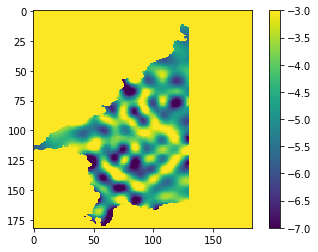

In [40]:
# inversion
plt.imshow(np.log10(np.loadtxt(os.path.join(t_d,"k.txt"))))
plt.colorbar()

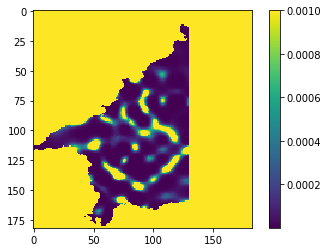

In [41]:
plt.imshow((np.loadtxt(os.path.join(t_d,"k.txt"))))
plt.colorbar()

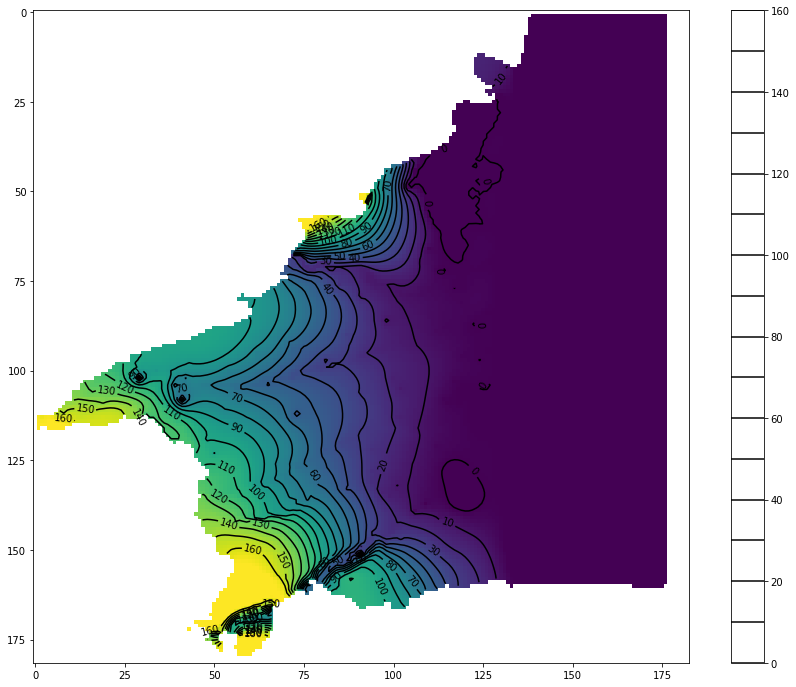

In [50]:
import sys
sys.path.append("../../modules")
# hand made functions
from Rouss import *

fig,ax=plt.subplots(1,1,figsize=(15,12))
head = get_heads("pest_2D_R","template")
head[head>1000] = None
plt.imshow(head[0],vmin=0,vmax=170)

cont = plt.contour(head[0],levels=np.arange(0,170,10),colors="k")
plt.clabel(cont,fmt="%i")
plt.colorbar()